**Mounting the notebook with the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Unzipping the dataset**

In [2]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/INTERNSHIP/ToothNumber_TaskDataset.zip"
extract_path = os.path.dirname(zip_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed successfully!")


Extraction completed successfully!


**Installing ultralytics library to import the YOLO models**

In [3]:
!pip install ultralytics==8.* python-docx opencv-python matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 23.0 MB/s eta 0:00:00


**Importing the Necessary Libraries**

In [4]:
import os, random, shutil
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
from docx import Document
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Splitting the data into Train , Test and Validation sets**

Train - 80%  
Test - 10%  
Validation - 10%

In [5]:
base_dir = Path("/content/drive/MyDrive/INTERNSHIP")
images_dir = base_dir / "images"
labels_dir = base_dir / "labels"

splits = ["train", "val", "test"]
for split in splits:
    for sub in ["images", "labels"]:
        Path(base_dir / split / sub).mkdir(parents=True, exist_ok=True)


all_images = [f for f in images_dir.glob("*") if f.suffix.lower() in [".jpg",".jpeg",".png"]]

random.seed(42)
random.shuffle(all_images)

n = len(all_images)
n_train = int(0.8 * n)
n_val = int(0.1 * n)
train_files = all_images[:n_train]
val_files = all_images[n_train:n_train+n_val]
test_files = all_images[n_train+n_val:]

split_map = {"train": train_files, "val": val_files, "test": test_files}

for split, files in split_map.items():
    for img in files:
        stem = img.stem
        label = labels_dir / f"{stem}.txt"
        if label.exists():
            shutil.copy(img, base_dir / split / "images" / img.name)
            shutil.copy(label, base_dir / split / "labels" / label.name)

print({k: len(v) for k,v in split_map.items()})


{'train': 397, 'val': 49, 'test': 51}


**Creating the Yaml file including the 32 FDI classes**

In [6]:
yaml_content = """train: /content/drive/MyDrive/INTERNSHIP/images
val: /content/drive/MyDrive/INTERNSHIP/val
test: /content/drive/MyDrive/INTERNSHIP/test

names:
  0: Canine (13)
  1: Canine (23)
  2: Canine (33)
  3: Canine (43)
  4: Central Incisor (21)
  5: Central Incisor (41)
  6: Central Incisor (31)
  7: Central Incisor (11)
  8: First Molar (16)
  9: First Molar (26)
  10: First Molar (36)
  11: First Molar (46)
  12: First Premolar (14)
  13: First Premolar (34)
  14: First Premolar (44)
  15: First Premolar (24)
  16: Lateral Incisor (22)
  17: Lateral Incisor (32)
  18: Lateral Incisor (42)
  19: Lateral Incisor (12)
  20: Second Molar (17)
  21: Second Molar (27)
  22: Second Molar (37)
  23: Second Molar (47)
  24: Second Premolar (15)
  25: Second Premolar (25)
  26: Second Premolar (35)
  27: Second Premolar (45)
  28: Third Molar (18)
  29: Third Molar (28)
  30: Third Molar (38)
  31: Third Molar (48)
"""
with open("/content/drive/MyDrive/INTERNSHIP/data.yaml", "w") as f:
    f.write(yaml_content)

print("data.yaml created ✅")


data.yaml created ✅


**Training on yolov8 model**

In [7]:
model = YOLO("yolov8s.pt")

results = model.train(
    data="/content/drive/MyDrive/INTERNSHIP/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16
)

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/INTERNSHIP/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

**Training on yolov9 model**

In [8]:
model = YOLO("yolov9s.pt")

results = model.train(
    data="/content/drive/MyDrive/INTERNSHIP/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16
)

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/INTERNSHIP/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

**Training on yolov11 model**

In [9]:
model = YOLO("yolo11s.pt")

# Train
results = model.train(
    data="/content/drive/MyDrive/INTERNSHIP/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16
)

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/INTERNSHIP/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

**Saving the Results of best weights of all models in a Table**

In [13]:
import pandas as pd

data_path = "/content/drive/MyDrive/INTERNSHIP/data.yaml"

model_paths = {
    "YOLOv8s": "runs/detect/train/weights/best.pt",
    "YOLOv9s": "runs/detect/train2/weights/best.pt",
    "YOLOv11s": "runs/detect/train3/weights/best.pt"
}

results_list = []

for name, path in model_paths.items():
    print(f"\n===== Evaluating {name} =====\n")
    model = YOLO(path)
    metrics = model.val(data=data_path, split="test")

    results_list.append({
        "Model": name,
        "Precision": round(metrics.box.mp, 4),   # mean precision
        "Recall": round(metrics.box.mr, 4),      # mean recall
        "mAP@50": round(metrics.box.map50, 4),   # mAP at IoU=0.5
        "mAP@50-95": round(metrics.box.map, 4)   # mAP averaged across 0.5–0.95
    })

df = pd.DataFrame(results_list)
print("\n📊 Comparison of YOLO Models:\n")
print(df)



===== Evaluating YOLOv8s =====

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,137,968 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 49.5±14.3 MB/s, size: 94.6 KB)
val: Scanning /content/drive/MyDrive/INTERNSHIP/test/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 51/51 69745.5it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.3it/s 3.2s
                   all         51       1352      0.989      0.987      0.993      0.808
           Canine (13)         45         45      0.978      0.995      0.994      0.771
           Canine (23)         41         41      0.964      0.976      0.994      0.782
           Canine (33)         50         50      0.992       0.96      0.994      0.784
           Canine (43)         49         50      0.999       0.98      0.994      0.805
  Ce

We prepared the dataset by performing an 80/10/10 split for training, validation, and testing while ensuring proper image–label pairing. To evaluate performance, we trained **YOLOv8s**, YOLOv9s, and YOLOv11s models using pretrained weights at 640×640 resolution for 100 epochs. Each model was assessed on the test set using precision, recall, mAP@50, and mAP@50–95 metrics. As we can see, **YOLOv8s** achieved the highest mAP@50–95 score (0.8084), slightly outperforming YOLOv11s (0.8037) and YOLOv9s (0.7918). Since mAP@50–95 is the strictest and most reliable evaluation metric, we selected **YOLOv8s** as the final model for this task, while noting that both YOLOv9s and YOLOv11s delivered very strong results overall.

In [14]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

metrics = model.val(data="/content/drive/MyDrive/INTERNSHIP/data.yaml", split="test")

print("✅ Validation done. Check runs/detect/val2/ for plots.")


Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,137,968 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 31.8±13.0 MB/s, size: 72.1 KB)
val: Scanning /content/drive/MyDrive/INTERNSHIP/test/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 51/51 55720.1it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.90it/s 4.4s
                   all         51       1352      0.989      0.987      0.993      0.808
           Canine (13)         45         45      0.978      0.995      0.994      0.771
           Canine (23)         41         41      0.964      0.976      0.994      0.782
           Canine (33)         50         50      0.992       0.96      0.994      0.784
           Canine (43)         49         50      0.999       0.98      0.994      0.805
  Central Incisor (21)         43   

**Confusion Matrix**

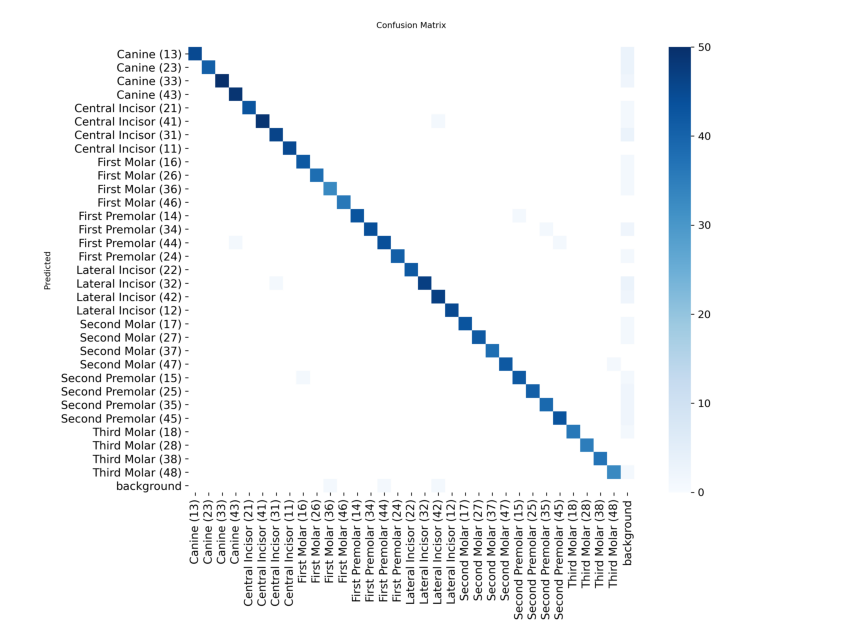

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "runs/detect/val2/confusion_matrix.png"

img = mpimg.imread(img_path)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


**Testing YOLOv8s on sample images**


image 1/1 /content/drive/MyDrive/INTERNSHIP/images/00147087-20240918-120248027.jpg: 640x640 1 Canine (13), 1 Canine (23), 2 Canine (33)s, 1 Canine (43), 1 Central Incisor (21), 1 Central Incisor (41), 1 Central Incisor (31), 1 Central Incisor (11), 1 First Molar (16), 1 First Molar (26), 1 First Molar (36), 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (44), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 1 Lateral Incisor (12), 1 Second Molar (17), 1 Second Molar (27), 1 Second Premolar (15), 1 Second Premolar (25), 1 Second Premolar (35), 1 Second Premolar (45), 1 Third Molar (18), 1 Third Molar (48), 15.7ms
Speed: 2.4ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


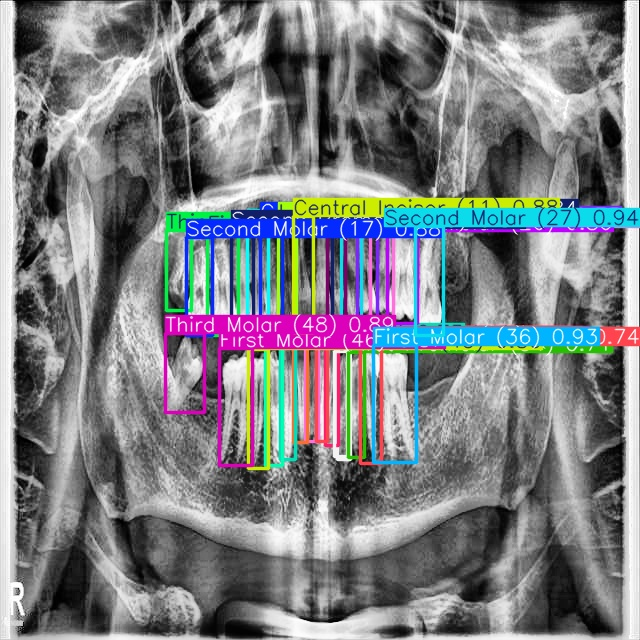

Prediction displayed and saved for: /content/drive/MyDrive/INTERNSHIP/images/00147087-20240918-120248027.jpg

image 1/1 /content/drive/MyDrive/INTERNSHIP/images/05473f26-20240924-154033777.jpg: 640x640 1 Canine (13), 1 Canine (23), 1 Canine (33), 1 Canine (43), 1 Central Incisor (21), 3 Central Incisor (41)s, 1 Central Incisor (31), 1 Central Incisor (11), 1 First Molar (16), 1 First Molar (26), 1 First Molar (36), 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (44), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 1 Lateral Incisor (12), 1 Second Molar (17), 1 Second Molar (27), 1 Second Molar (37), 1 Second Molar (47), 1 Second Premolar (15), 1 Second Premolar (25), 1 Second Premolar (35), 1 Second Premolar (45), 1 Third Molar (18), 1 Third Molar (28), 1 Third Molar (38), 1 Third Molar (48), 15.8ms
Speed: 2.3ms preprocess, 15.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results s

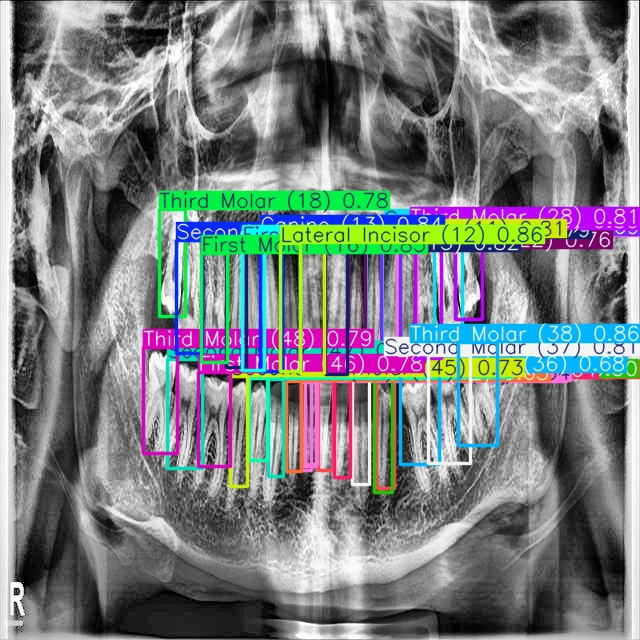

Prediction displayed and saved for: /content/drive/MyDrive/INTERNSHIP/images/05473f26-20240924-154033777.jpg

image 1/1 /content/drive/MyDrive/INTERNSHIP/images/061339f1-20240911-110938655.jpg: 640x640 1 Canine (13), 1 Canine (23), 1 Canine (33), 1 Canine (43), 1 Central Incisor (21), 1 Central Incisor (41), 1 Central Incisor (31), 1 Central Incisor (11), 1 First Molar (16), 1 First Molar (26), 1 First Molar (36), 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 2 First Premolar (44)s, 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 1 Lateral Incisor (12), 1 Second Molar (17), 1 Second Molar (27), 1 Second Molar (37), 1 Second Molar (47), 1 Second Premolar (15), 1 Second Premolar (25), 1 Second Premolar (35), 2 Second Premolar (45)s, 1 Third Molar (18), 1 Third Molar (28), 1 Third Molar (38), 15.7ms
Speed: 2.1ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect

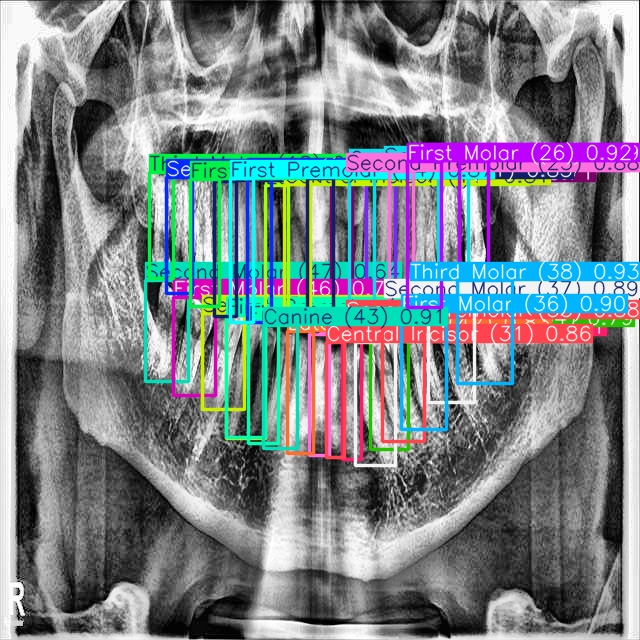

Prediction displayed and saved for: /content/drive/MyDrive/INTERNSHIP/images/061339f1-20240911-110938655.jpg


In [23]:
from ultralytics import YOLO
from IPython.display import Image, display

model_path = "runs/detect/train3/weights/best.pt"
model = YOLO(model_path)

image_paths = [
    "/content/drive/MyDrive/INTERNSHIP/images/00147087-20240918-120248027.jpg",
    "/content/drive/MyDrive/INTERNSHIP/images/05473f26-20240924-154033777.jpg",
    "/content/drive/MyDrive/INTERNSHIP/images/061339f1-20240911-110938655.jpg"
]

for img_path in image_paths:
    results = model.predict(source=img_path, save=True)
    output_path = results[0].save_dir + "/" + img_path.split("/")[-1]
    display(Image(filename=output_path))
    print(f"Prediction displayed and saved for: {img_path}")


**Training Curves**

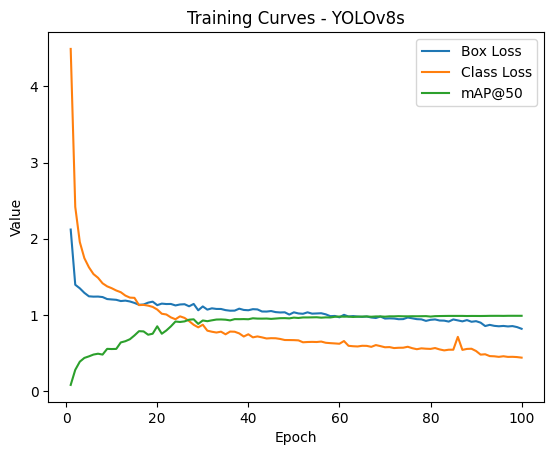

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "runs/detect/train3/results.csv"

df = pd.read_csv(csv_path)

plt.figure()
plt.plot(df['epoch'], df['train/box_loss'], label="Box Loss")
plt.plot(df['epoch'], df['train/cls_loss'], label="Class Loss")
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label="mAP@50")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Training Curves - YOLOv8s")
plt.legend()
plt.show()


**Post processing**

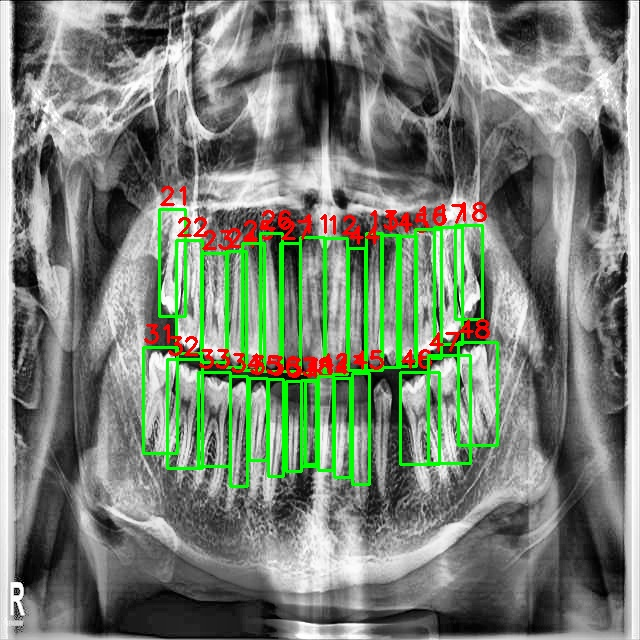

In [25]:
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import display, Image

# =============================
# 1. Load model & run inference
# =============================
model = YOLO("runs/detect/train3/weights/best.pt")  # best YOLOv8s
img_path = "/content/drive/MyDrive/INTERNSHIP/images/05473f26-20240924-154033777.jpg"

results = model.predict(source=img_path, conf=0.5, save=False, verbose=False)
boxes   = results[0].boxes.xyxy.cpu().numpy()
classes = results[0].boxes.cls.cpu().numpy()
scores  = results[0].boxes.conf.cpu().numpy()

# =============================
# 2. Compute centers
# =============================
centers = []
for (x1,y1,x2,y2), cls in zip(boxes, classes):
    cx, cy = (x1+x2)/2, (y1+y2)/2
    centers.append((cx, cy, int(cls), (x1,y1,x2,y2)))

# =============================
# 3. Separate Upper vs Lower Jaw
# =============================
y_median = np.median([c[1] for c in centers])
upper_teeth = [c for c in centers if c[1] < y_median]
lower_teeth = [c for c in centers if c[1] >= y_median]

# =============================
# 4. Split Left vs Right Quadrants
# =============================
x_median = np.median([c[0] for c in centers])

upper_left  = [c for c in upper_teeth if c[0] < x_median]
upper_right = [c for c in upper_teeth if c[0] >= x_median]
lower_left  = [c for c in lower_teeth if c[0] < x_median]
lower_right = [c for c in lower_teeth if c[0] >= x_median]

# =============================
# 5. Sort each quadrant (by X)
# =============================
upper_left.sort(key=lambda c: c[0])
upper_right.sort(key=lambda c: c[0])
lower_left.sort(key=lambda c: c[0])
lower_right.sort(key=lambda c: c[0])

# =============================
# 6. FDI Labels
# =============================
FDI_labels = {
    "upper_right": [11,12,13,14,15,16,17,18],
    "upper_left":  [21,22,23,24,25,26,27,28],
    "lower_left":  [31,32,33,34,35,36,37,38],
    "lower_right": [41,42,43,44,45,46,47,48]
}

def assign_FDI(teeth, labels):
    assigned = []
    for i, t in enumerate(teeth):
        if i < len(labels):
            assigned.append((t[0], t[1], labels[i], t[3]))
    return assigned

upper_right_assigned = assign_FDI(upper_right, FDI_labels["upper_right"])
upper_left_assigned  = assign_FDI(upper_left,  FDI_labels["upper_left"])
lower_left_assigned  = assign_FDI(lower_left,  FDI_labels["lower_left"])
lower_right_assigned = assign_FDI(lower_right, FDI_labels["lower_right"])

all_teeth = upper_right_assigned + upper_left_assigned + lower_left_assigned + lower_right_assigned

# =============================
# 7. Draw Bounding Boxes + FDI
# =============================
image = cv2.imread(img_path)

for cx, cy, fdi, (x1,y1,x2,y2) in all_teeth:

    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)

    cv2.putText(image, str(fdi), (int(x1), int(y1)-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

output_path = "output_FDI.jpg"
cv2.imwrite(output_path, image)

display(Image(filename=output_path))
